# K-Nearest Neighbors (KNN) 

In this section we focus on a simple and straight-forward machine learning model, k-nearest neighbors (KNN).

KNN is a non-parametric supervised model, and its main idea is to classify or regress by compute the k closest training examples in the data set.

### 1. KNN Algorithm

For our distance measure, we will choose the Euclidean distance defined by the following equation:

$$ d(p, q) = \sqrt{(p - q)^{T} (p - q)} $$

In [17]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))


With our distance function, we are now ready to write a function to compute the $k$-nearest neighbors to a given point. This is done in the code cell below.

In [18]:
def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []
    
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

Now that we have a function to compute the $k$-nearest neighbors to a point, we can now write a function to predict a target label. However, we should note that KNN can be used for both classification and regression machine learning. This is shown in the code cell below.

In [19]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

Next we write a function to compute the classification error

In [20]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point, 
                                      training_features, 
                                      training_labels, 
                                      k)
    return error/len(test_features)

### 2. Classification

For classification problem, we will implement and train this model on the palmerpenguins dataset, and get started by running the following code in the cell below.

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the palmerpenguins dataset into a pandas DataFrame object
df = pd.read_csv("palmer_penguins.csv")

###  2.1 Data preprocessing

In [4]:
df.head(3)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [5]:
df.dropna(how = 'any', inplace = True)
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


To illustrate this point, we plot the bill_length versus bill_depth.

In [14]:
penguin = df.species.unique().tolist()

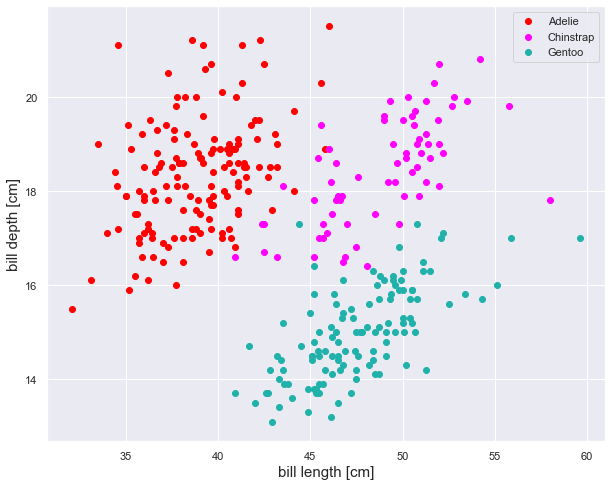

In [15]:
colors = ["red", "magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguin, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill length [cm]", fontsize = 15)
ax.set_ylabel("bill depth [cm]", fontsize = 15)
ax.legend()
plt.show()

There are clearly three clusters in the figure, and their boundaries are almost clear. In the image above that most of the time, similar data points are close to each other. The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. Next, we try on KNN model to make classification.

Before implementing this algorithm we creat a training set and testing set by running the following code.

In [16]:
X = df[["bill_length_mm",
          "bill_depth_mm"]].to_numpy()

y = df["species"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

### 2.2 KNN Model applied

For each point in X_test, we apply the KNN and make the predictions

In [25]:
predictions = [KNN_Predict(one_point, X_train, y_train, 5)
              for one_point in X_test]
#predictions

### 2.3 Error Analysis

We use the classfication error set above to show the accuracy

In [28]:
classfication_error = np.sum(predictions != y_test)/len(y_test)
print(f"The classfication_error is: {round(classfication_error, 3)}")

The classfication_error is: 0.055


The classfication error does not seems very good. We can try different values of k from 3 to 20 to see whether or not there are significant changes in classification error.

### 2.4 Try Different Values in K

In [34]:
possible_k = [k for k in range(3, 21, 2)]
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

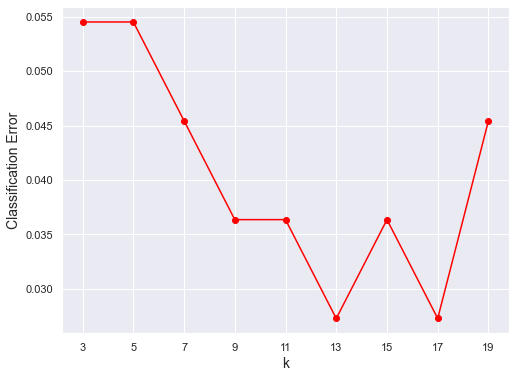

In [35]:
plt.figure(figsize = (8, 6))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()


From the classfication error plot, we can see that when k increases, the classification error would decrease first. But, when k increases over some point, the classification error would begin to increase.

### 3. Regression

Second, for regression problem, we train KNN model on California housing dataset 

load the data

In [81]:
df2 = datasets.fetch_california_housing()

In [106]:
X = df2.data
y = df2.target

We store the 8 features into X and target into y. Let us overview the features and target.

In [113]:
X.shape

(20640, 8)

There are two many rows in this dataset, KNN would become significantly slow. we can extract subset.

In [119]:
X = X[:1000,:]
y = y[:1000]

Lets try our KNN model to predict prices using the first three features. We split data into training and test data sets, and choose $k$ be 5.

We use mean square error(MSE) to evaluate the prediction.

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X[:,0:2], y, test_size=0.2)

predictions = [KNN_Predict(one_point, X_train, y_train, 5,regression=True)
              for one_point in X_test]

MSE = sum([(predictions[i]-y_test[i])**2 for i in range(len(y_test))])/len(y_test)
print(f"The prediction mean square error is: {round(MSE, 3)}")

The prediction mean square error is: 0.534


We can also look the determination coefficient

In [121]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test, predictions)
print(f"The prediction determination coefficient (R^2) is: {round(R2, 3)}")

The prediction determination coefficient (R^2) is: 0.308


We can see that the determination coefficient is not high enough. Then, we try all the features.

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

predictions = [KNN_Predict(one_point, X_train, y_train, 5,regression=True)
              for one_point in X_test]

MSE = sum([(predictions[i]-y_test[i])**2 for i in range(len(y_test))])/len(y_test)
print(f"The prediction mean square error is: {round(MSE, 3)}")

The prediction mean square error is: 1.393


In [123]:
R2 = r2_score(y_test, predictions)
print(f"The prediction determination coefficient (R^2) is: {round(R2, 3)}")

The prediction determination coefficient (R^2) is: -0.158


The R^2 is negative, which means the model is very bad.

We can try to scale our data to 0 mean and 1 variance to see if it can fix the problem.

In [124]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

predictions = [KNN_Predict(one_point, X_train, y_train, 5,regression=True)
              for one_point in X_test]

MSE = sum([(predictions[i]-y_test[i])**2 for i in range(len(y_test))])/len(y_test)
print(f"The prediction mean square error is: {round(MSE, 3)}")

The prediction mean square error is: 1.157


In [126]:
R2 = r2_score(y_test, predictions)
print(f"The prediction determination coefficient (R^2) is: {round(R2, 3)}")

The prediction determination coefficient (R^2) is: -0.456


It seems that it does not always more features can bring more accuracy. We can make the loop to see how many features can bring the highest R^2?

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X[:,0:4], y, test_size=0.2)

predictions = [KNN_Predict(one_point, X_train, y_train, 5,regression=True)
              for one_point in X_test]

MSE = sum([(predictions[i]-y_test[i])**2 for i in range(len(y_test))])/len(y_test)
print(f"The prediction mean square error is: {round(MSE, 3)}")


The prediction mean square error is: 0.276


In [132]:
R2 = r2_score(y_test, predictions)
print(f"The prediction determination coefficient (R^2) is: {round(R2, 3)}")

The prediction determination coefficient (R^2) is: 0.732


In [138]:
possible_i = [i for i in range(1,X.shape[1]+1)]
MSE_ = []
Rsquared = []
for j in possible_i:
    
    X_train, X_test, y_train, y_test = train_test_split(X[:,0:j], y, test_size=0.2)

    predictions = [KNN_Predict(one_point, X_train, y_train, 5,regression=True)
              for one_point in X_test]

    MSE = sum([(predictions[i]-y_test[i])**2 for i in range(len(y_test))])/len(y_test)
    R2 = r2_score(y_test, predictions)
    MSE_.append(MSE)
    Rsquared.append(R2)
 

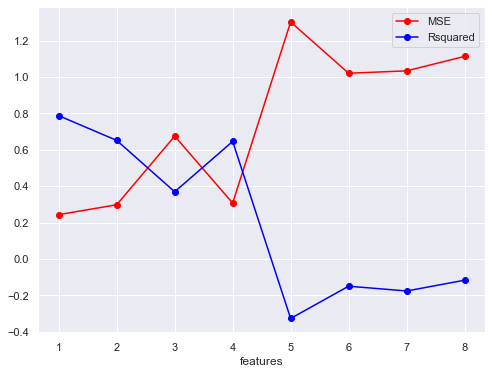

In [145]:
plt.figure(figsize = (8,6))
plt.plot(possible_i, MSE_, color = 'red', marker = 'o', label='MSE')
plt.plot(possible_i, Rsquared, color = 'blue', marker = 'o',label = 'Rsquared')
plt.xlabel('features')
plt.legend()
plt.show()

We can see that when features increase, the accuracy becomes lower. It shows that when faced with multi variables dataset, we cannot use KNN directly. we need first filter the variables.